# Following 6 steps are required to train our model with our images
1. Download and import packages
2. Assemble our dataset from api key or directory
3. Train our custom Yolov5 model
4. Evaluate our model
5. Run inference with trained weights
6. Export our model in onnx formate
At last download our weight files

# Step 1: Downloads and imports

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow


import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12348, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 12348 (delta 23), reused 31 (delta 15), pack-reused 12292
Receiving objects: 100% (12348/12348), 12.68 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (8492/8492), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 34.8 MB/s 
     |████████████████████████████████| 145 kB 41.3 MB/s 
     |████████████████████████████████| 178 kB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 67 kB 7.3 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 138 kB 68.9 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [2]:
import os
from IPython.display import Image, clear_output  # to display images
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Step 2: Assemble Our Dataset



In [3]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [4]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [5]:
rf = Roboflow(api_key="cQ8Fyb9jrqZhRdYXwKFX")
project = rf.workspace("micronexus").project("axe-tracker")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Axe-tracker-1 in yolov5pytorch:: 100%|██████████| 708/708 [00:00<00:00, 1894.80it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [6]:
dataset.location

'/content/datasets/Axe-tracker-1'

In [7]:
!python train.py --img 416 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5m.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Axe-tracker-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-118-gc7a2d6b Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

# Step 4: Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

In [8]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs/train/exp

<IPython.core.display.Javascript object>

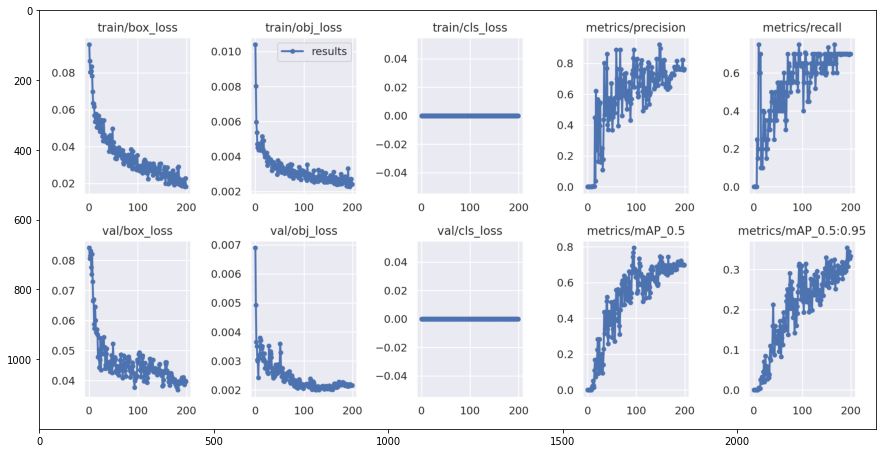

In [9]:
plt.figure(figsize=(15, 10))
plt.imshow(plt.imread("runs/train/exp/results.png"))
plt.show()

# Step 5: Run Inference  With Trained Weights
Run inference with a pretrained checkpoint

In [10]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Axe-tracker-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-118-gc7a2d6b Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/7 /content/datasets/Axe-tracker-1/test/images/tourney64-long_mp4-143_jpg.rf.d5b31ae580ce5df52fc21dea176052f6.jpg: 416x416 1 axe, 8.2ms
image 2/7 /content/datasets/Axe-tracker-1/test/images/tourney64-long_mp4-225_jpg.rf.9552cb184111cc409a9a73595d39d4dd.jpg: 416x416 1 axe, 10.5ms
image 3/7 /content/datasets/Axe-trac

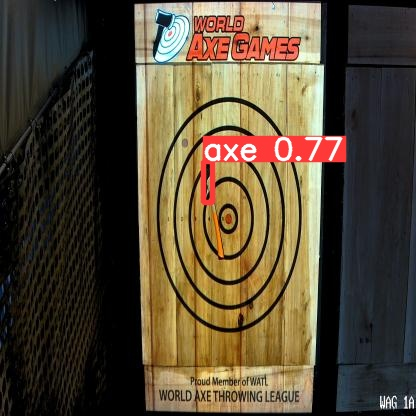

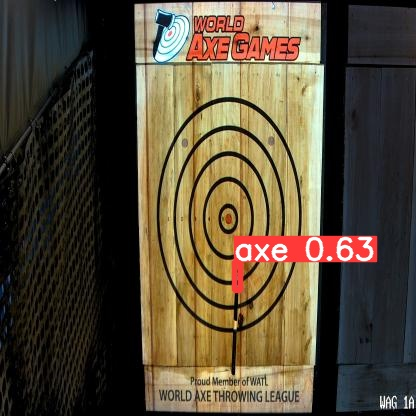

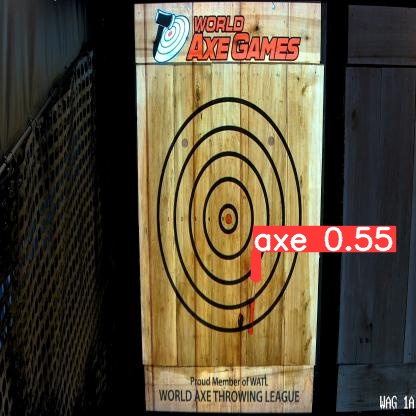

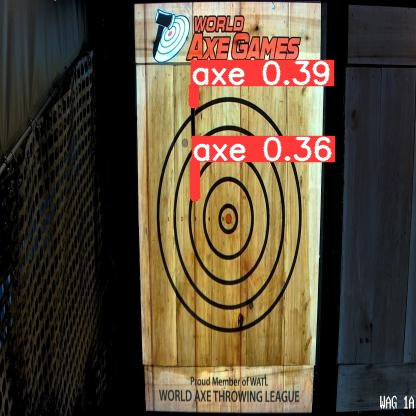

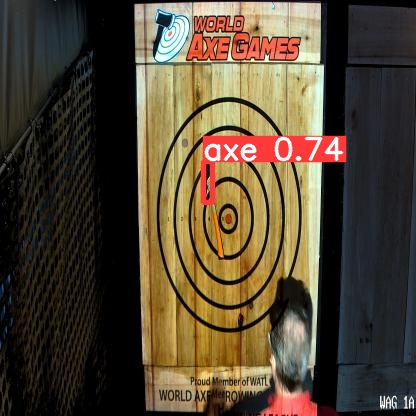

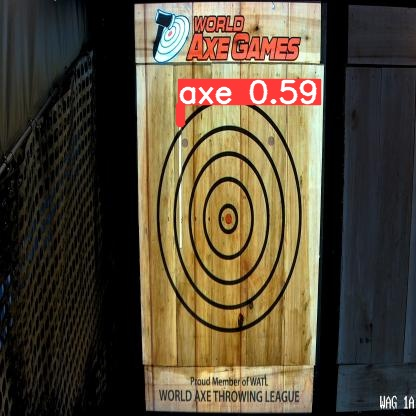

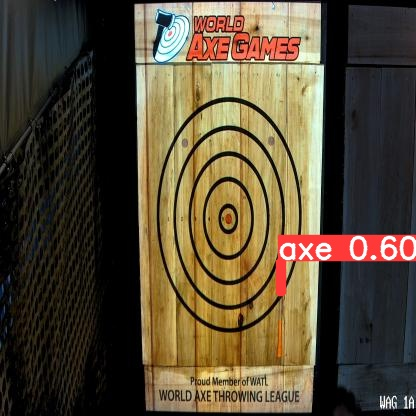

In [11]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Step 6: Export our model

In [12]:
!python export.py --weights runs/train/exp/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v6.2-118-gc7a2d6b Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 6) (13.7 MB)

TorchScript: starting export with torch 1.12.1+cu113...
TorchScript: export success ✅ 2.6s, saved as runs/train/exp/weights/best.torchscript (27.2 MB)
requirements: YOLOv5 requirement "onnx" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated p

# Dowloading weight files


In [13]:
#export your model's weights for future use
from google.colab import files
files.download('runs/train/exp/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
files.download('runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>